<a href="https://colab.research.google.com/github/gracialukelo/deep_ann/blob/main/iris_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [15]:
# 1. Daten laden und verarbeiten
iris = load_iris()
X, y = iris.data, iris.target
X.shape, y.shape

((150, 4), (150,))

In [16]:
# One Hot Encoding
y = torch.nn.functional.one_hot(torch.tensor(y), num_classes=3)
y.shape

torch.Size([150, 3])

In [17]:
# 3. Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

z= x−μ/𝜎

x: Der ursprüngliche Wert eines Features.

μ: Der Mittelwert des Features (über die Trainingsdaten berechnet).

σ: Die Standardabweichung des Features (über die Trainingsdaten berechnet).

In [20]:
# Daten normalisieren
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# In Tensoren umwandeln
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

<ipython-input-22-4ab7edf6e79c>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-22-4ab7edf6e79c>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32)


In [23]:
# Datenloader erstellen
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [25]:
# 2. Defition des Models
import torch.nn.functional as F

class Modell(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super(Modell, self).__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

model = Modell(in_features=4, h1=8, h2=16, out_features=3)
model

Modell(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=3, bias=True)
)

In [26]:
# 3. Training

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 100
train_losses = []

for epoch in range(epochs):
  model.train()
  epoch_loss = 0
  for X_batch, y_batch in train_loader:
    # Vorwärtsdurchlauf
    output = model(X_batch)
    loss = criterion(output, y_batch.argmax(dim=1))

    # Gradient
    optimizer.zero_grad()

    # Rückwärtsdurchlauf und Optimierung
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()
  train_losses.append(epoch_loss / len(train_loader))
  print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}")


Epoch 1/100, Loss: 1.0323
Epoch 2/100, Loss: 0.8007
Epoch 3/100, Loss: 0.5918
Epoch 4/100, Loss: 0.4734
Epoch 5/100, Loss: 0.3822
Epoch 6/100, Loss: 0.3167
Epoch 7/100, Loss: 0.2539
Epoch 8/100, Loss: 0.1865
Epoch 9/100, Loss: 0.1431
Epoch 10/100, Loss: 0.1050
Epoch 11/100, Loss: 0.0941
Epoch 12/100, Loss: 0.0930
Epoch 13/100, Loss: 0.0711
Epoch 14/100, Loss: 0.0602
Epoch 15/100, Loss: 0.0804
Epoch 16/100, Loss: 0.0744
Epoch 17/100, Loss: 0.0796
Epoch 18/100, Loss: 0.0820
Epoch 19/100, Loss: 0.0958
Epoch 20/100, Loss: 0.0592
Epoch 21/100, Loss: 0.0569
Epoch 22/100, Loss: 0.0719
Epoch 23/100, Loss: 0.0586
Epoch 24/100, Loss: 0.0568
Epoch 25/100, Loss: 0.0546
Epoch 26/100, Loss: 0.0699
Epoch 27/100, Loss: 0.0497
Epoch 28/100, Loss: 0.0505
Epoch 29/100, Loss: 0.0444
Epoch 30/100, Loss: 0.0435
Epoch 31/100, Loss: 0.0422
Epoch 32/100, Loss: 0.0432
Epoch 33/100, Loss: 0.0465
Epoch 34/100, Loss: 0.0432
Epoch 35/100, Loss: 0.0501
Epoch 36/100, Loss: 0.0451
Epoch 37/100, Loss: 0.0473
Epoch 38/1

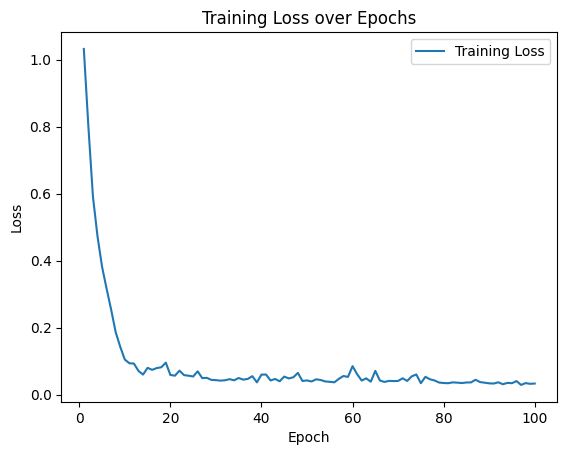

In [27]:
# Training visualisieren
plt.plot(range(1, epochs+1), train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.show()

In [32]:
# 5. Modell speichern
torch.save(model.state_dict(), "/content/iris_model.pth")

In [34]:
# Modell laden
loaded_model = Modell(in_features=4, h1=8, h2=16, out_features=3)
loaded_model.load_state_dict(torch.load("/content/iris_model.pth"))
loaded_model.eval()
print("Modell erfolgreich geladen.")


Modell erfolgreich geladen.


<ipython-input-34-378d76c75696>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load("/content/iris_model.pth"))


In [36]:
with torch.no_grad():
  y_pred = loaded_model(X_test)
  y_pred_classes = torch.argmax(y_pred, dim=1)
  y_true_classes = torch.argmax(y_test, dim=1)


# Ergebnisse anzeigen
accuracy = (y_pred_classes == y_true_classes).sum().item() / len(y_true_classes)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

Accuracy on test data: 96.67%


In [37]:
# Funktion zur Vorhersage einzelner Datenpunkte
def predict_iris_class(features, model, scaler):
    """
    Funktion zur Vorhersage der Iris-Art basierend auf Eingabe-Features.
    :param features: Liste von 4 numerischen Werten [SepalLength, SepalWidth, PetalLength, PetalWidth]
    :param model: Das trainierte Modell
    :param scaler: Der StandardScaler für die Normalisierung
    :return: Vorhergesagte Iris-Art
    """
    # Normalisieren der Eingabefeatures
    features = scaler.transform([features])
    features_tensor = torch.tensor(features, dtype=torch.float32)

    # Vorhersage mit dem Modell
    with torch.no_grad():
        output = model(features_tensor)
        predicted_class = torch.argmax(output, dim=1).item()

    # Mapping der Klassen-ID zu Namen
    class_mapping = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
    return class_mapping[predicted_class]

# Beispiel: Eingabe eines neuen Datenpunkts
new_features = [5.1, 3.5, 1.4, 0.2]  # Beispielwerte für SepalLength, SepalWidth, PetalLength, PetalWidth
predicted_class = predict_iris_class(new_features, loaded_model, scaler)
print(f"Die vorhergesagte Iris-Art für die Eingabe {new_features} ist: {predicted_class}")

Die vorhergesagte Iris-Art für die Eingabe [5.1, 3.5, 1.4, 0.2] ist: Setosa
